# Single Partcle Motion

In [4]:
import math
from math import sqrt as sqrt
import numpy as np
import matplotlib.pyplot as plt
#to display inside the notebook!
%matplotlib inline

In [5]:
#initial time
t_initial=0
#final time
t_final=10
#time step
dt=0.5
#number of time steps declared as integer
n = int((t_final-t_initial)/dt)
#electron mass
m=9.10938356e-31
#gravity at sea level
gx=0
gy=-9.81
#initial velocity
vx_initial=0
vy_initial=0
#we use the momemtum to be physically sound, even if using velocity is more computationally effecient
px_initial=m*vx_initial
py_initial=m*vy_initial
#initial position
x_initial=0
y_initial=0

In [6]:
x=np.zeros(1)
y=np.zeros(1)

In [7]:
px_old=px_initial
py_old=py_initial
x_old=x_initial
y_old=y_initial

In [8]:
for i in range(1,n,1):
    fx=m*gx #this is the force along x
    fy=m*gy #this is the force along y
    px_new=fx*dt+px_old #new momentum
    py_new=fy*dt+py_old
    vx=px_new/m #new velocity
    vy=py_new/m
    x_new=vx*dt+x_old #new position
    y_new=vy*dt+y_old
    x=np.append(x,[x_new]) #the positions are appended at the end of the x and y arrays.
    y=np.append(y,[y_new])
    x_old=x_new # we now replace the old data with the new ones
    y_old=y_new
    px_old=px_new
    py_old=py_new
# and the loop starts again.

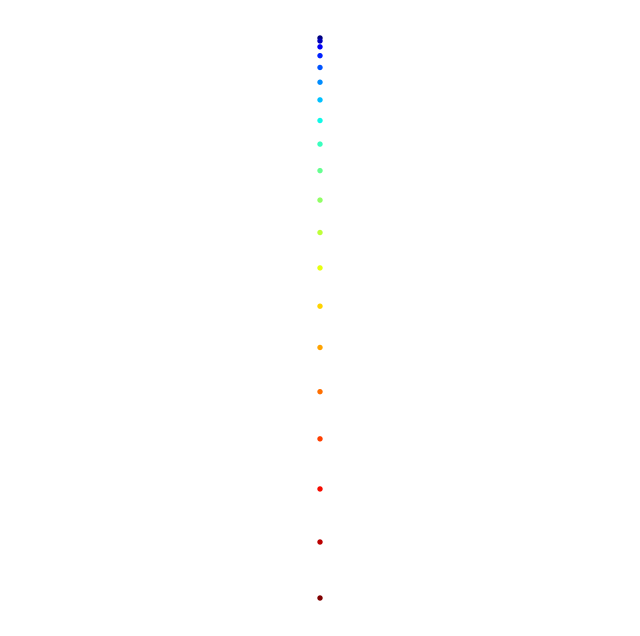

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x, y, c=range(n), linewidths=0,marker='o', s=15, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

In [10]:
k = 100
x_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, x)
y_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, y)

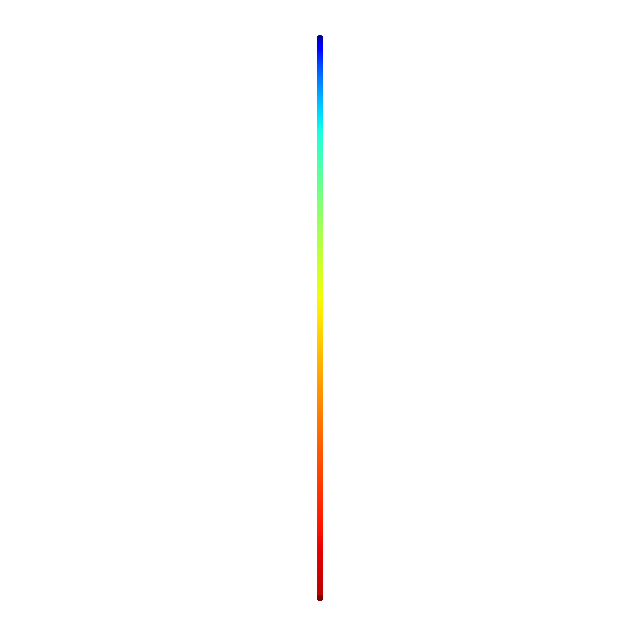

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x_interpolated, y_interpolated, c=range(n*k), linewidths=0,
           marker='o', s=15, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

In [12]:
def plot_2D(x,y,n_interpolated,plot_size,plot_axes):
    n = len(x)
    k = n_interpolated
    x_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, x)
    y_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, y)
    fig, ax = plt.subplots(1, 1, figsize=(plot_size, plot_size))
    # Now, we draw our points with a gradient of colors.
    ax.scatter(x_interpolated, y_interpolated, c=range(n*k), linewidths=0,
               marker='o', s=2*plot_size, cmap=plt.cm.jet,) #s is the size of the plotted symbol 'o'
    ax.axis('equal')
    if (plot_axes!="axes"):#so we can switch the axis on or off
        ax.set_axis_off()
    else:
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")

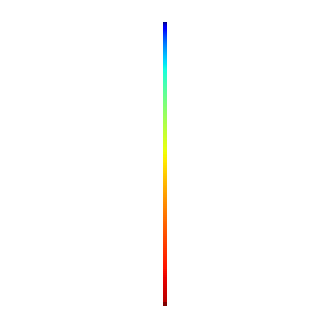

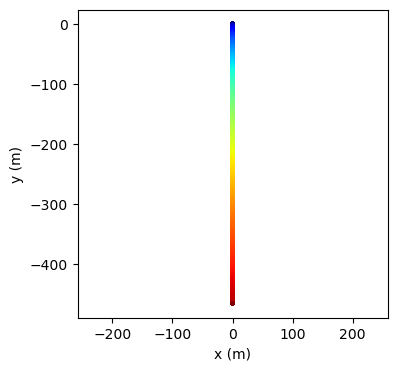

In [13]:
plot_2D(x_interpolated,y_interpolated,10,4,"no")
plot_2D(x_interpolated,y_interpolated,10,4,"axes")

In [14]:
def ODE_integration(x_initial,y_initial,vx_initial,vy_initial,t_initial,t_final,n_steps):
    x=np.full(1,x_initial) # we do this to initialize the x variable as a numpy array
    y=np.full(1,y_initial)
    px_old=vx_initial*m
    py_old=vy_initial*m
    dt=(t_final-t_initial)/n_steps
    for i in range(1,n_steps,1):
        fx=m*gx #this is the force along x
        fy=m*gy #this is the force along y
        px_new=fx*dt+px_old #new momentum
        py_new=fy*dt+py_old
        vx=px_new/m #new velocity
        vy=py_new/m
        x_new=vx*dt+x[i-1] #new position
        y_new=vy*dt+y[i-1] # in python arrays start at index 0
        x=np.append(x,x_new) #the positions are appended at the end of the x and y arrays.
        y=np.append(y,y_new)
        """The ones below are not needed. We use the ones from the previous step inside the array
        x_old=x_new
        y_old=y_new"""
        px_old=px_new
        py_old=py_new
    return x,y
# and the loop starts again.

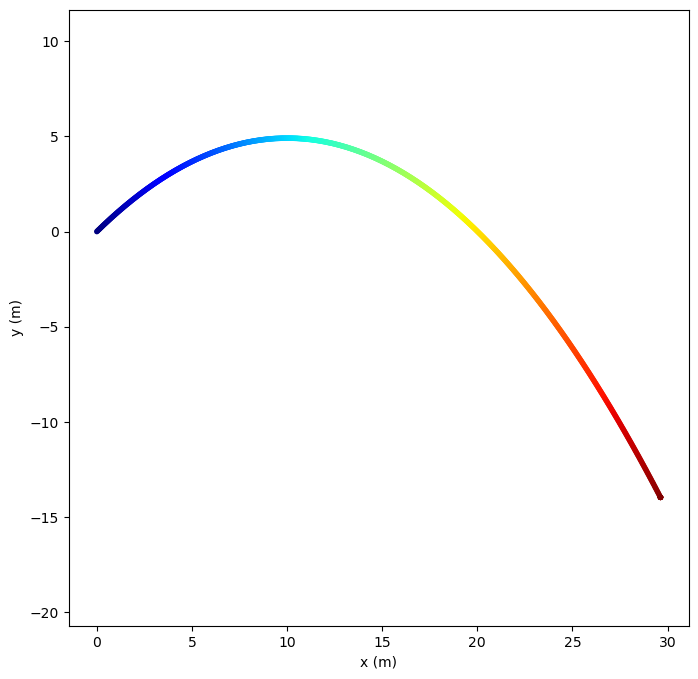

In [15]:
x,y=ODE_integration(0,0,10,10,0,3,80)
plot_2D(x,y,10,8,"axes")

In [16]:
q=-1.60217662e-19
Ex=0
Ey=1
vx_final=0
vy_final=0
clight=299792458

In [17]:
def ODE_integration_E(x_initial,y_initial,vx_initial,vy_initial,t_initial,t_final,n_steps):
    x=np.full(1,x_initial) # we do this to initialize the x variable as a numpy array
    y=np.full(1,y_initial)
    px_old=vx_initial*m
    py_old=vy_initial*m
    dt=(t_final-t_initial)/n_steps
    for i in range(1,n_steps,1):
        fx=q*Ex #this is the force along x
        fy=q*Ey #this is the force along y
        px_new=fx*dt+px_old #new momentum
        py_new=fy*dt+py_old
        vx=px_new/m #new velocity
        vy=py_new/m
        x_new=vx*dt+x[i-1] #new position
        y_new=vy*dt+y[i-1] # in python arrays start at index 0
        x=np.append(x,x_new) #the positions are appended at the end of the x and y arrays using numpy.
        y=np.append(y,y_new)
        px_old=px_new
        py_old=py_new
    print(vx/clight,vy/clight)
    print(x[n_steps-1],"m",y[n_steps-1],"m")
    return x,y
# and the loop starts again.

0.0 -1759.1576096745716
0.0 m -791073275720.6312 m


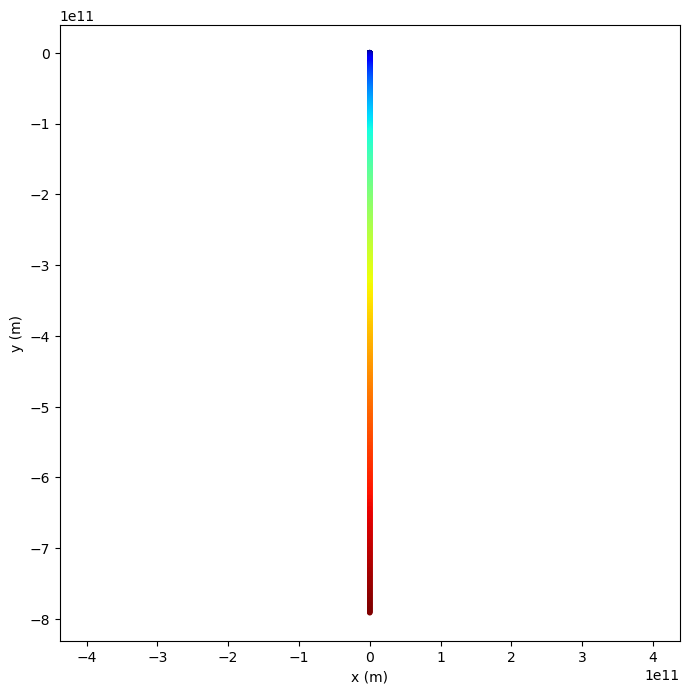

In [18]:
x,y=ODE_integration_E(0,0,0,0,0,3,2000)
plot_2D(x,y,1,8,"axes")

In [19]:
print(q*Ey/(2.*m)*3.**2,"m")

-791469010225.7589 m


0.0 -0.0016720357470644369
0.0 m -0.7518955597144708 m


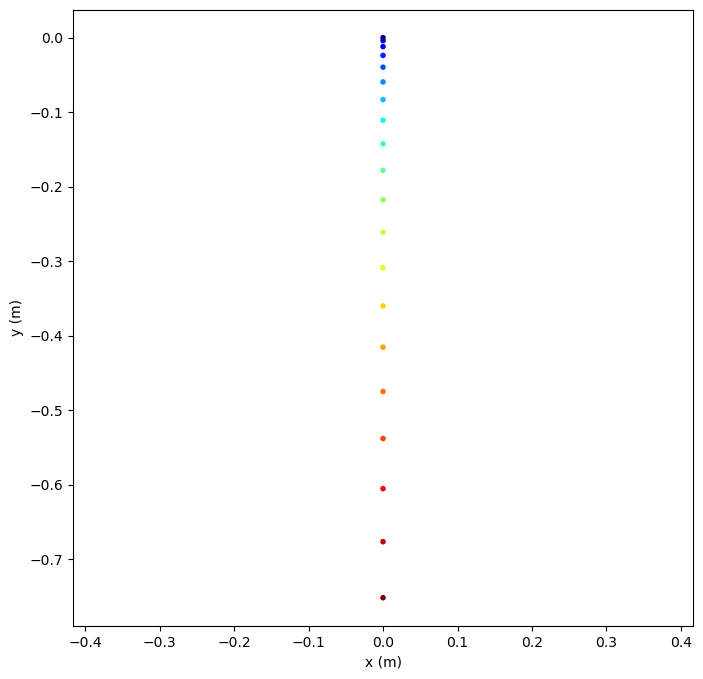

In [20]:
x,y=ODE_integration_E(0,0,0,0,0,3e-6,20)
plot_2D(x,y,1,8,"axes")

0.0006671281903963041 -0.002217377922960473
0.9833333333333347 m -1.1785496112648044 m


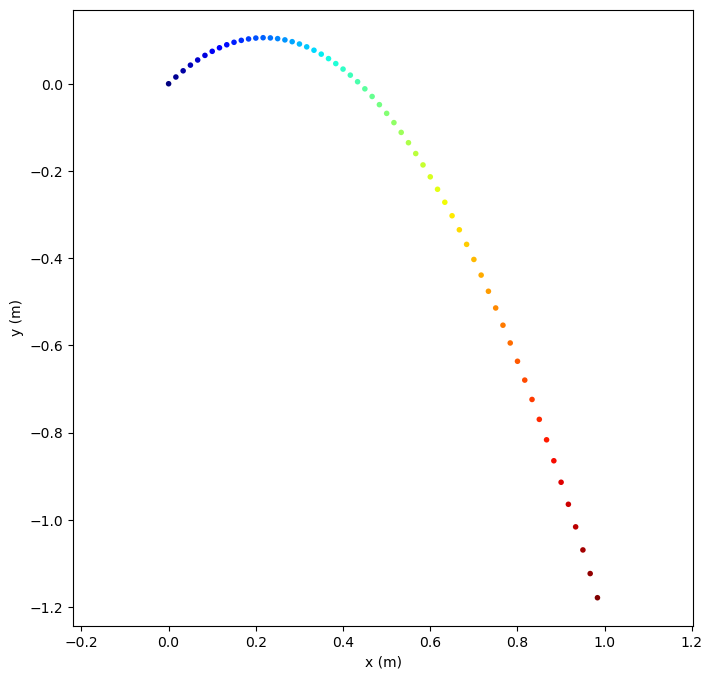

In [21]:
x,y=ODE_integration_E(0,0,2e5,2e5,0,5e-6,60)
plot_2D(x,y,1,8,"axes")

In [22]:
def ODE_integration_E_with_charge(charge_location,charge_value,initial_position,initial_velocity,time_frame,n_steps):
    loc=np.zeros((3,n_steps)) #index 0 is x, index 1 is y and index 2 is z
    loc[:,0]=initial_position
    """ Let's start to use vectors and combine notations
    the column : is equivalent to writing
    loc[0,0]=initial_position[0]
    loc[1,0]=initial_position[1]
    loc[2,0]=initial_position[2]
    """
    v_old=initial_velocity
    dt=(time_frame[1]-time_frame[0])/n_steps
    E=[0,0,0]
    f=np.zeros(3)
    v_new=np.zeros(3)
    for i in range(1,n_steps,1):
        r=sqrt((loc[0,i-1]-charge_location[0])**2+(loc[1,i-1]-charge_location[1])**2+(loc[2,i-1]-charge_location[2])**2)
        if (r<1e-7):
            r=1e-7 # we won't divide by 0
        r_unit=(loc[:,i-1]-charge_location)/r
        E=1./(4*3.1416*8.85e-12)*charge_value/r**2*r_unit
        f=q*E
        v_new=f/m*dt+v_old #new velocity
        loc[:,i]=v_new*dt+loc[:,i-1] #new position
        v_old=v_new
    return loc

In [23]:
def plot_2D_with_charge(rc,x,y,n_interpolated,plot_size,plot_axes):
    n = len(x)
    k = n_interpolated
    x_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, x)
    y_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, y)
    fig, ax = plt.subplots(1, 1, figsize=(plot_size, plot_size))
    # Now, we draw our points with a gradient of colors.
    ax.scatter(x_interpolated, y_interpolated, c=range(n*k), linewidths=0,
               marker='o', s=2*plot_size, cmap=plt.cm.jet,) #s is the size of the plotted symbol 'o'
    ax.scatter(rc[0], rc[1], c='black', linewidths=0,
               marker='x', s=3*plot_size,)
    ax.axis('equal')
    if (plot_axes!="axes"):#so we can switch the axis on or off
        ax.set_axis_off()
    else:
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")

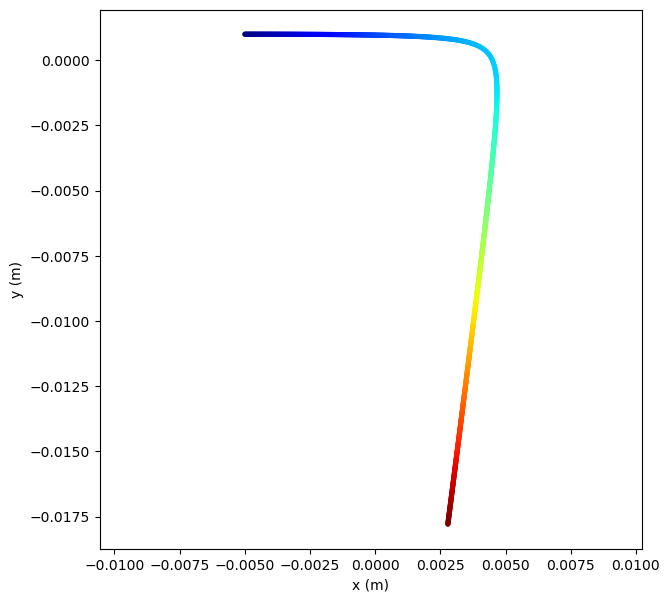

In [24]:
rc=[4e-3,0,0] #charge location
qc=1.6e-19 #charge value
loc=ODE_integration_E_with_charge(rc,qc,(-5e-3,10e-4,0),(500,0,0),(0,50e-6),1000)
plot_2D_with_charge(rc,loc[0,:],loc[1,:],1,7,"axes")

In [25]:
r_L=1e3*9e-31/(1.6e-19*1)
print(r_L,"m")

5.6250000000000016e-09 m


In [26]:
m=9e-31
q=-1.6e-19
def ODE_integration_B(initial_position,initial_velocity,time_frame,n_steps):
    loc=np.zeros((3,n_steps)) #3 for x,y,z
    loc[:,0]=initial_position
    v_old=initial_velocity
    dt=(time_frame[1]-time_frame[0])/n_steps
    B=[0,0,1]
    f=np.zeros(3)
    v_new=np.zeros(3)
    for i in range(1,n_steps,1):
        f=q*np.cross(v_old,B)
        v_new=f/m*dt+v_old #new momentum
        loc[:,i]=v_new*dt+loc[:,i-1] #new position
        v_old=v_new
    return loc

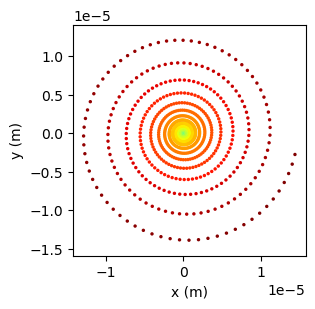

In [27]:
r_initial=np.array([0,0,0])
v_initial=np.array([1000,0,0])
time_frame=[0,1e-9]
r=ODE_integration_B(r_initial,v_initial,time_frame,2000)
plot_2D(r[0,:],r[1,:],1,3,"axes")

In [28]:
def plot_2D_autoscale(x,y,n_interpolated=1,plot_size=3,plot_axes="none"):
    n = len(x)
    k = n_interpolated
    #interpolation
    x_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, x)
    y_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, y)
    #generate figure and axes
    fig, ax = plt.subplots(1, 1, figsize=(plot_size, plot_size))
    ax.scatter(x_interpolated, y_interpolated, c=range(n*k), linewidths=0,
               marker='o', s=2*plot_size, cmap=plt.cm.jet,) #s is the size of the plotted symbol 'o'
    ax.axis('equal')
    #compute autoscale parameters
    xc=(x.max()+x.min())/2.
    x_low=xc-(x.max()-x.min())/2.*1.1
    x_high=xc+(x.max()-x.min())/2.*1.1
    yc=(y.max()+y.min())/2.
    y_low=yc-(y.max()-y.min())/2.*1.1
    y_high=yc+(y.max()-y.min())/2.*1.1
    #set autoscale parameters
    ax.set_xlim(x_low,x_high)
    ax.set_ylim(y_low,y_high)
    if (plot_axes!="axes"):#so we can switch the axis on or off
        ax.set_axis_off()
    else:
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")

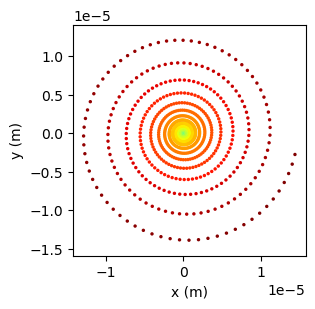

In [29]:
plot_2D_autoscale(r[0,:],r[1,:],plot_axes="axes")

In [30]:
def Lorentz_factor(v):
    v2=norm(v)**2
    c=299792458
    return 1./sqrt(1-v2/c**2)

In [31]:
def get_E(r,t):
    return np.array([0,0,0])
def get_B(r,t):
    return np.array([0,0,1])

In [32]:
def EM_field_tensor(E,B):
    c=299792458
    F_mu_nu=np.array([0,E[0]/c,E[1]/c,E[2]/c,E[0]/c,0,-B[2],B[1],E[1]/c,B[2],0,-B[0],E[2]/c,-B[1],B[0],0])
    F_mu_nu.shape=(4,4)
    return F_mu_nu

In [33]:
from scipy.linalg import expm
from numpy.linalg import norm
import time

In [34]:
m=9e-31
q=-1.6e-19
c=299792458

In [35]:
def ODE_integration_exponential_integrator(initial_position,initial_velocity,time_frame,n_steps,n_integrate):
    start_time = time.time()
    loc=np.zeros((3,n_steps)) #3 for x,y,z
    loc[:,0]=initial_position
    v=initial_velocity
    gamma=Lorentz_factor(v)
    p_old=np.array([m*c,m*v[0],m*v[1],m*v[2]])*gamma
    p_new=np.zeros(4)
    t=0
    dt=(time_frame[1]-time_frame[0])/n_steps
    ds=dt/n_integrate
    for i in range(1,n_steps,1): #solution of the momentum equation
        B=get_B(loc[:,i-1],t)
        E=get_E(loc[:,i-1],t)
        F_mu_nu=EM_field_tensor(E,B)
        p_new=np.matmul(expm(q/(m*gamma)*F_mu_nu*dt),p_old)
        gamma=p_new[0]/(m*c)
        P=np.zeros((4,4))
        s=0.
        dPds=np.eye(4)*ds/2
        x=np.zeros(4)
        for j in range(0,n_integrate,1): #trapezoidal integration to get the trajectory
            s+=ds
            if (i>0):
                P+=dPds
            dPds=expm(q/(m*gamma)*F_mu_nu*s)*ds/2
            if (i==0):
                P+=dPds
            P+=dPds
        x=np.matmul(P,p_old)/(m*gamma)
        loc[:,i]=x[1:4]+loc[:,i-1] #new position
        p_old=p_new
        t+=dt
    #print("--- %s seconds ---" % (time.time() - start_time))
    return loc

In [36]:
def ODE_integration_first_order_exponential_integrator(initial_position,initial_velocity,time_frame,n_steps):
    start_time = time.time()
    loc=np.zeros((3,n_steps)) #3 for x,y,z
    loc[:,0]=initial_position
    v_old=initial_velocity
    p_old=np.zeros(4)
    p_old[0]=m*c
    p_old[1:4]=m*v_old
    p_old*=Lorentz_factor(initial_velocity)
    p_new=np.zeros(4)
    dt=(time_frame[1]-time_frame[0])/n_steps
    f=np.zeros(3)
    v_new=np.zeros(3)
    gamma=Lorentz_factor(v_old)
    t=0
    for i in range(1,n_steps,1):
        B=get_B(loc[:,i-1],t)
        E=get_E(loc[:,i-1],t)
        F_mu_nu=EM_field_tensor(E,B)
        p_new=np.matmul(expm(q/(m*gamma)*F_mu_nu*dt),p_old)
        gamma=p_new[0]/(m*c)
        v_new=p_new[1:4]/(m*gamma)
        loc[:,i]=v_new*dt+loc[:,i-1] #new position
        p_old=p_new
        t+=dt
    #print("--- %s seconds ---" % (time.time() - start_time))
    return loc

Gyration time = 3.534291735288518e-11 s
Larmor radius = 5.6250000000000016e-09 m
-5.623743503265958e-09 5.623743503263875e-09


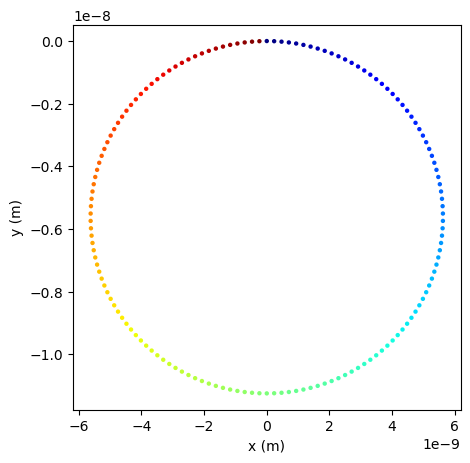

In [37]:
r_initial=np.array([0,0,0])
v_initial=np.array([1000,0,0])
t_gyration=m/(abs(q)*norm(get_B(r_initial,0)))*(2*math.pi)
time_frame=[0,t_gyration]
print('Gyration time =',t_gyration,'s')
print('Larmor radius =',norm(v_initial)*m/(abs(q)*norm(get_B(r_initial,time_frame[0]))),'m')
r=ODE_integration_exponential_integrator(r_initial,v_initial,time_frame,150,6)
print(r[0,:].min(),r[0,:].max())
plot_2D_autoscale(r[0,:],r[1,:],n_interpolated=1,plot_size=5,plot_axes="axes")

Larmor radius = 5.6250000000000016e-09 m
-5.7432209791038e-09 5.5076015300845365e-09


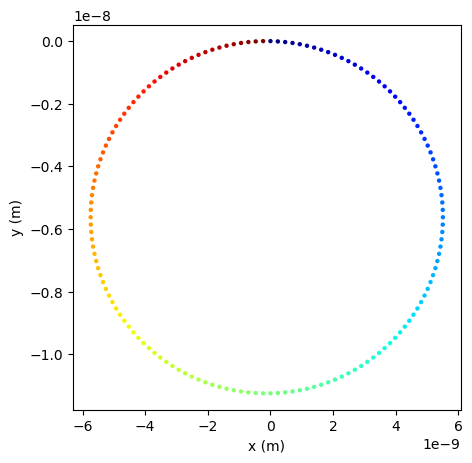

In [38]:
r=ODE_integration_first_order_exponential_integrator(r_initial,v_initial,time_frame,150)
print('Larmor radius =',norm(v_initial)*m/(abs(q)*norm(get_B(r_initial,time_frame[0]))),'m')
print(r[0,:].min(),r[0,:].max())
plot_2D_autoscale(r[0,:],r[1,:],n_interpolated=1,plot_size=5,plot_axes="axes")

Larmor radius = 5.6250000000000016e-09 m
-2.9804726080783875e-08 4.122206137687338e-09


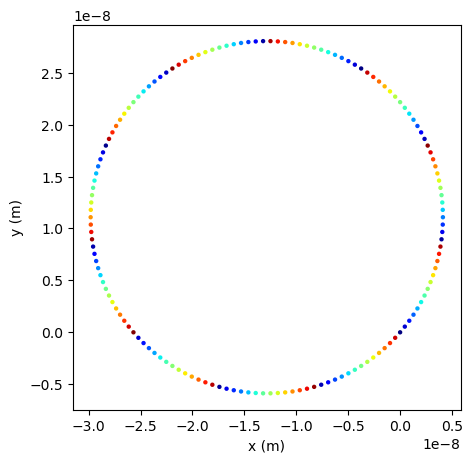

In [39]:
time_frame=[0,109*t_gyration]
r=ODE_integration_first_order_exponential_integrator(r_initial,v_initial,time_frame,150)
print('Larmor radius =',norm(v_initial)*m/(abs(q)*norm(get_B(r_initial,time_frame[0]))),'m')
print(r[0,:].min(),r[0,:].max())
plot_2D_autoscale(r[0,:],r[1,:],n_interpolated=1,plot_size=5,plot_axes="axes")

Larmor radius = 5.6250000000000016e-09 m
-5.34973317889928e-09 5.349733178685811e-09


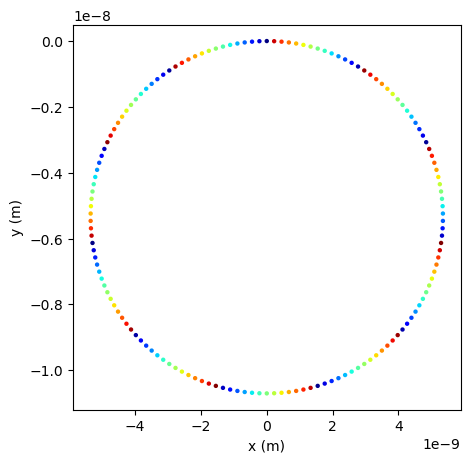

In [40]:
r=ODE_integration_exponential_integrator(r_initial,v_initial,time_frame,150,6)
print('Larmor radius =',norm(v_initial)*m/(abs(q)*norm(get_B(r_initial,time_frame[0]))),'m')
print(r[0,:].min(),r[0,:].max())
plot_2D_autoscale(r[0,:],r[1,:],n_interpolated=1,plot_size=5,plot_axes="axes")

In [41]:
def plot_3D_autoscale(loc,n_interpolated=1,plot_size=3,plot_axes="none"):
    from mpl_toolkits.mplot3d import Axes3D
    n = len(loc[0])
    k = n_interpolated
    #interpolation
    x_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, loc[0,:])
    y_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, loc[1,:])
    z_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, loc[2,:])
    #generate figure and axes
    fig = plt.figure(figsize=(plot_size,plot_size))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_interpolated, y_interpolated, z_interpolated, c=range(n*k), linewidths=0,
               marker='o', s=2*plot_size, cmap=plt.cm.jet,) #s is the size of the plotted symbol 'o'
    #compute autoscale parameters
    xc=(loc[0,:].max()+loc[0,:].min())/2.
    x_low=xc-(loc[0,:].max()-loc[0,:].min())/2.*1.1-1e-12
    x_high=xc+(loc[0,:].max()-loc[0,:].min())/2.*1.1+1e-12
    yc=(loc[1,:].max()+loc[1,:].min())/2.
    y_low=yc-(loc[1,:].max()-loc[1,:].min())/2.*1.1-1e-12
    y_high=yc+(loc[1,:].max()-loc[1,:].min())/2.*1.1+1e-12
    zc=(loc[2,:].max()+loc[2,:].min())/2.
    z_low=zc-(loc[2,:].max()-loc[2,:].min())/2.*1.1-1e-12
    z_high=zc+(loc[2,:].max()-loc[2,:].min())/2.*1.1+1e-12
    #set autoscale parameters
    ax.set_xlim(min(x_low,y_low,z_low),max(x_high,y_high,z_high))
    ax.set_ylim(min(x_low,y_low,z_low),max(x_high,y_high,z_high))
    ax.set_zlim(min(x_low,y_low,z_low),max(x_high,y_high,z_high))
    if (plot_axes!="axes"):#so we can switch the axis on or off
        ax.set_axis_off()
    else:
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        ax.set_zlabel("z (m)")

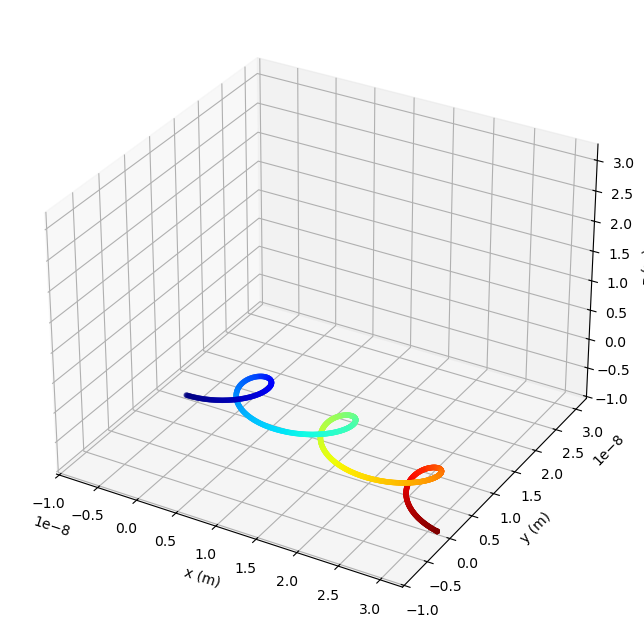

In [42]:
def get_E(r,t):
    return np.array([0,300,10])
def get_B(r,t):
    return np.array([0,0,-1])
r_initial=np.array([0,0,0])
v_initial=np.array([1000,0,0])
t_gyration=m/(abs(q)*norm(get_B(r_initial,time_frame[0])))*(2*math.pi)
time_frame=[0,3*t_gyration]
r=ODE_integration_exponential_integrator(r_initial,v_initial,time_frame,150,6)
plot_3D_autoscale(r,n_interpolated=10,plot_size=8,plot_axes="axes")

In [43]:
def plotly_3D(loc,n_interpolated=1,sphere_size=1,opacity_value=0,scale_axis='x',autoscale=False):
    import plotly.offline as py
    import plotly.graph_objs as go
    py.init_notebook_mode()
    n = len(loc[0])
    k = n_interpolated
    #interpolation
    x_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, loc[0,:])
    y_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, loc[1,:])
    z_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, loc[2,:])
    trace = go.Scatter3d(
        x = x_interpolated,
        y = y_interpolated,
        z = z_interpolated,
        mode='markers',
        name = 'test',
        marker=dict(
            size=sphere_size,
            color=np.linspace(0, 1, len(r[0,:])*k), # set color to an array/list of desired values
            colorscale='Jet',   # choose a colorscale
            opacity=opacity_value
        )
    )
    xc=(loc[0,:].max()+loc[0,:].min())/2.
    x_low=xc-(loc[0,:].max()-loc[0,:].min())/2.*1.1-1e-12
    x_high=xc+(loc[0,:].max()-loc[0,:].min())/2.*1.1+1e-12
    yc=(loc[1,:].max()+loc[1,:].min())/2.
    y_low=yc-(loc[1,:].max()-loc[1,:].min())/2.*1.1-1e-12
    y_high=yc+(loc[1,:].max()-loc[1,:].min())/2.*1.1+1e-12
    zc=(loc[2,:].max()+loc[2,:].min())/2.
    z_low=zc-(loc[2,:].max()-loc[2,:].min())/2.*1.1-1e-12
    z_high=zc+(loc[2,:].max()-loc[2,:].min())/2.*1.1+1e-12
    ratio_x=1
    ratio_y=1
    ratio_z=1
    if (autoscale==False):
        max_length=max(abs(x_high-x_low),abs(y_high-y_low),abs(z_high-z_low))
        ratio_x=abs(x_high-x_low)/max_length
        ratio_y=abs(y_high-y_low)/max_length
        ratio_z=abs(z_high-z_low)/max_length
        max_ratio=max(ratio_x,ratio_y,ratio_z)
        ratio_x/=max_ratio
        ratio_y/=max_ratio
        ratio_z/=max_ratio

    data = [trace]
    layout = go.Layout(
        autosize=False,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        paper_bgcolor = 'grey',
        scene = dict(
            aspectratio = dict( x=ratio_x, y=ratio_y, z=ratio_z),
            xaxis = dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)',
                nticks=4, range = [x_low,x_high],),
            yaxis = dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)',
                nticks=4, range = [y_low,y_high],),
            zaxis = dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=False,
                backgroundcolor='rgb(230, 230,230)',
                nticks=4, range = [z_low,z_high],),),
        height =300,
        width=500,
        hovermode=False
        )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')

In [44]:
#plotly_3D(r,n_interpolated=10,sphere_size=2,autoscale=False)

In [45]:
def get_E(r,t):
    return np.array([0,10,0])
def get_B(r,t):
    return np.array([0,0,1])
r_initial=np.array([0,0,0])
v_initial=np.array([10,0,0])
t_gyration=m/(abs(q)*norm(get_B(r_initial,time_frame[0])))*(2*math.pi)
time_frame=[0,11*t_gyration]
r=ODE_integration_exponential_integrator(r_initial,v_initial,time_frame,250,8)
#plotly_3D(r,n_interpolated=20,sphere_size=2,autoscale=False)